# PROJECT: FACE IMAGE ENHANCEMENT AND RESTORATION PIPELINE

## ENVIRONMENTAL SETUP AND DEPENDENCIES

### OBJECTIVE
TO ESTABLISH A ROBUST DEEP LEARNING ENVIRONMENT CAPABLE OF EXECUTING COMPLEX IMAGE RESTORATION TASKS. WE WILL LEVERAGE PYTORCH FOR TENSOR OPERATIONS AND SPECIALIZED LIBRARIES (`GFPGAN`, `REALESRGAN`) THAT IMPLEMENT GENERATIVE ADVERSARIAL NETWORKS (GANS) FOR BLIND FACE RESTORATION.

### DEPENDENCY ARCHITECTURE
* **TORCH & TORCHVISION**: FOUNDATIONAL LIBRARIES FOR DEEP LEARNING AND TENSOR CALCULATIONS.
* **OPENCV-PYTHON (CV2)**: FOR EFFICIENT IMAGE I/O AND PRE-PROCESSING MATRICES.
* **BASISCR**: A TOOLBOX FOR IMAGE SUPER-RESOLUTION AND RESTORATION (ARCHITECTURAL BACKBONE).
* **GFPGAN**: STATE-OF-THE-ART BLIND FACE RESTORATION MODEL LEVERAGING GENERATIVE FACIAL PRIORS.
* **REALESRGAN**: PRACTICAL ALGORITHMS FOR GENERAL IMAGE RESTORATION.
* **NUMPY**: FOR HIGH-PERFORMANCE MULTIDIMENSIONAL ARRAY OBJECTS.
* **MATPLOTLIB**: FOR VISUALIZING SIGNAL OUTPUTS AND IMAGE DATA.

### INSTRUCTION FOR VS CODE USERS
EXECUTE THE FOLLOWING COMMANDS IN YOUR TERMINAL OR A CODE CELL TO INSTALL THE NECESSARY PACKAGES. ENSURE YOUR CUDA DRIVERS ARE UPDATED IF USING GPU ACCELERATION.

THIS PROJECT REQUIRES A MODERN DEEP LEARNING STACK FOR FACE DETECTION, RESTORATION, SUPER-RESOLUTION, AND IDENTITY PRESERVATION.

ALL DEPENDENCIES ARE SELECTED TO ENSURE:
- STATE-OF-THE-ART PERFORMANCE
- MODULAR PIPELINE DESIGN
- GPU ACCELERATION SUPPORT
- REPRODUCIBILITY
- CLEAN INTEGRATION WITH JUPYTER NOTEBOOKS IN VS CODE

THE FOLLOWING LIBRARIES WILL BE USED FOR:
- CORE NUMERICAL COMPUTATION
- DEEP LEARNING MODEL INFERENCE
- FACE DETECTION AND ALIGNMENT
- IMAGE RESTORATION AND SUPER-RESOLUTION
- PERCEPTUAL AND IDENTITY-BASED EVALUATION
- VISUALIZATION AND ANALYSIS

## LIBRARY IMPORTS AND DEVICE CONFIGURATION

### MATHEMATICAL CONTEXT
WE INITIALIZE THE COMPUTATIONAL GRAPH ENGINE (PYTORCH) AND CONFIGURE THE HARDWARE ACCELERATOR (GPU/CUDA OR MPS) TO HANDLE HIGH-DIMENSIONAL TENSOR CONVOLUTIONS EFFICIENTLY. THIS STEP ENSURES THAT MATRIX MULTIPLICATIONS REQUIRED BY THE GAN GENERATORS ARE PARALLELIZED.

### IMPORT LIBRARIES

In [2]:
import os
import cv2
import math
import torch

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

### CONFIGURATION SETTINGS

In [4]:
# SETTING THE DEVICE TO CUDA (NVIDIA GPU), MPS (APPLE SILICON), OR CPU
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
    # EMPTIES THE CACHE TO PREVENT MEMORY FRAGMENTATION
    torch.cuda.empty_cache()
elif torch.backends.mps.is_available():
    DEVICE = torch.device('mps')
else:
    DEVICE = torch.device('cpu')

In [8]:
# -----------------------------------------------------------------------------
# DOCSTRING
# -----------------------------------------------------------------------------
"""
INITIALIZES THE GLOBAL DEVICE CONFIGURATION FOR THE PIPELINE.

OUTPUTS:
    DEVICE (TORCH.DEVICE): THE COMPUTATIONAL DEVICE (CUDA, MPS, OR CPU) 
                           TO BE USED FOR TENSOR OPERATIONS.
"""

print(f"SYSTEM DEVICE CONFIGURATION: {str(DEVICE).upper()}")

SYSTEM DEVICE CONFIGURATION: CPU


## STANDARDIZED VISUALIZATION ENGINE

### DESIGN PHILOSOPHY
TO MAINTAIN RIGOROUS ANALYTICAL STANDARDS, ALL VISUAL OUTPUTS MUST ADHERE TO STRICT FORMATTING GUIDELINES:
1.  **RESOLUTION**: 500 DPI FOR PUBLICATION-QUALITY CLARITY.
2.  **GRID SYSTEM**: ENABLED FOR SPATIAL REFERENCE.
3.  **TYPOGRAPHY**: BOLD, UPPERCASE FONTS FOR MAXIMUM LEGIBILITY.

THIS UTILITY FUNCTION WILL BE USED THROUGHOUT THE PIPELINE TO COMPARE THE DEGRADED INPUT SIGNAL (INPUT IMAGE) WITH THE RESTORED OUTPUT SIGNAL (ENHANCED IMAGE).

In [ ]:
def display_image(img_rgb, title_text="IMAGE ANALYTICS"):
    """
    DISPLAYS A SINGLE IMAGE OR A BATCH OF IMAGES ADHERING TO STRICT 
    VISUALIZATION STANDARDS.

    ARGS:
        IMG_RGB (NUMPY.NDARRAY): IMAGE DATA IN RGB FORMAT (HEIGHT, WIDTH, CHANNELS).
        TITLE_TEXT (STR): TITLE OF THE PLOT IN UPPERCASE.

    RETURNS:
        NONE: RENDERS THE MATPLOTLIB FIGURE.
    """
    
    # -------------------------------------------------------------------------
    # GLOBAL PLOT STYLING
    # -------------------------------------------------------------------------
    rcParams['font.weight'] = 'bold'
    rcParams['axes.labelweight'] = 'bold'
    rcParams['axes.titleweight'] = 'bold'
    
    # DEFINE FIGURE DIMENSIONS AND DPI AS REQUESTED
    plt.figure(figsize=(8, 6), dpi=500)
    
    # -------------------------------------------------------------------------
    # IMAGE RENDERING
    # -------------------------------------------------------------------------
    if len(img_rgb.shape) == 2:
        # HANDLING GRAYSCALE IMAGES
        plt.imshow(img_rgb, cmap='gray')
    else:
        # HANDLING RGB IMAGES
        plt.imshow(img_rgb)
    
    # -------------------------------------------------------------------------
    # AXIS AND GRID FORMATTING
    # -------------------------------------------------------------------------
    plt.title(title_text.upper(), fontsize=12, pad=10)
    plt.xlabel("HORIZONTAL PIXEL COORDINATES (X)", fontsize=8)
    plt.ylabel("VERTICAL PIXEL COORDINATES (Y)", fontsize=8)
    
    # ENABLE GRID WITH CUSTOM STYLING
    plt.grid(True, which='major', linestyle='--', linewidth=0.5, color='white', alpha=0.7)
    
    # CONVERT TICKS TO UPPER CASE (MATPLOTLIB TICKS ARE NUMERIC, BUT WE FORMAT LABELS)
    plt.tick_params(axis='both', which='major', labelsize=8)
    
    # -------------------------------------------------------------------------
    # RENDER
    # -------------------------------------------------------------------------
    plt.tight_layout()
    plt.show()

# PROJECT ARCHITECTURE AND PIPELINE DESIGN

THIS PROJECT IS DESIGNED AS A MODULAR, AND EXTENSIBLE FACE IMAGE ENHANCEMENT PIPELINE.

THE PRIMARY OBJECTIVE OF THE ARCHITECTURE IS TO:
- HANDLE SEVERELY DEGRADED REAL-WORLD FACE IMAGES
- PRESERVE FACIAL IDENTITY AND GEOMETRY
- AVOID UNREALISTIC HALLUCINATIONS
- ENABLE EASY REPLACEMENT OR UPGRADE OF MODELS

THE PIPELINE IS DIVIDED INTO CLEARLY DEFINED STAGES, EACH WITH A SINGLE RESPONSIBILITY.

---

## HIGH-LEVEL PIPELINE OVERVIEW

INPUT LOW-QUALITY IMAGE  
↓  
FACE DETECTION AND LANDMARK-BASED ALIGNMENT  
↓  
IMAGE DENOISING AND DEBLURRING  
↓  
FACE RESTORATION (SEMANTIC DETAIL ENHANCEMENT)  
↓  
SUPER-RESOLUTION (SPATIAL UPSCALING)  
↓  
COLOR, CONTRAST, AND LIGHTING ENHANCEMENT  
↓  
IDENTITY CONSISTENCY VERIFICATION  
↓  
FINAL HIGH-RESOLUTION OUTPUT

---

## DESIGN PRINCIPLES

1. MODULARITY  
EACH STAGE IS IMPLEMENTED AS AN INDEPENDENT MODULE WITH CLEAR INPUTS AND OUTPUTS.

2. IDENTITY PRESERVATION FIRST  
FACE EMBEDDINGS ARE USED AS FEATURE-LEVEL CONSTRAINTS TO PREVENT IDENTITY DRIFT.

3. NO OVER-HALLUCINATION  
RESTORATION MODELS ARE CONFIGURED TO ENHANCE EXISTING STRUCTURE, NOT INVENT DETAILS.

4. REPRODUCIBILITY  
ALL PARAMETERS, MODELS, AND TRANSFORMATIONS ARE EXPLICITLY DEFINED.

5. EXTENSIBILITY  
ANY MODULE (E.G., SUPER-RESOLUTION MODEL) CAN BE SWAPPED WITHOUT BREAKING THE PIPELINE.

---

## MODULE BREAKDOWN

### 1. FACE DETECTION AND ALIGNMENT MODULE
- LOCATES FACE BOUNDING BOX
- EXTRACTS FACIAL LANDMARKS
- NORMALIZES SCALE, ROTATION, AND ORIENTATION

### 2. DENOISING AND DEBLURRING MODULE
- REMOVES SENSOR NOISE
- REDUCES MOTION AND DEFOCUS BLUR
- CLEANS COMPRESSION ARTIFACTS

### 3. FACE RESTORATION MODULE
- ENHANCES EYES, NOSE, MOUTH, AND SKIN TEXTURE
- USES SEMANTIC FACE PRIORS
- AVOIDS OVER-SHARPENING

### 4. SUPER-RESOLUTION MODULE
- UPSCALES IMAGE BY INTEGER FACTOR (E.G., ×4)
- MAINTAINS EDGE SHARPNESS
- PRESERVES NATURAL TEXTURE

### 5. COLOR AND LIGHTING ENHANCEMENT MODULE
- CORRECTS COLOR CASTS
- ADJUSTS CONTRAST AND DYNAMIC RANGE
- IMPROVES PERCEPTUAL VISUAL QUALITY

### 6. IDENTITY VERIFICATION MODULE
- COMPUTES FACE EMBEDDINGS
- MEASURES COSINE SIMILARITY
- FLAGS IDENTITY DEVIATION

---

## DATA FLOW CONTRACT

EACH MODULE ADHERES TO THE FOLLOWING INTERFACE:

INPUT:
- IMAGE AS NUMPY ARRAY (H × W × C, RGB, FLOAT32)

OUTPUT:
- IMAGE AS NUMPY ARRAY (H × W × C, RGB, FLOAT32)

NO MODULE MODIFIES GLOBAL STATE.

# DATA INGESTION AND SPATIAL ALIGNMENT

## IMAGE LOADING AND COLOR SPACE CONVERSION

### TECHNICAL STRATEGY
WE WILL LOAD THE RAW ARTIFACT FROM THE SPECIFIED DIRECTORY. OPENCV DEFAULTS TO BGR (BLUE-GREEN-RED) CHANNEL ORDERING, WHICH MUST BE CONVERTED TO RGB FOR ACCURATE MATPLOTLIB RENDERING AND NEURAL NETWORK PROCESSING. 

WE WILL ALSO NORMALIZE THE IMAGE DATA TO ENSURE CONSISTENCY BEFORE PASSING IT TO THE DETECTION ALGORITHMS.

IMAGE LOADED SUCCESSFULLY.
DIMENSIONS: (1600, 1200, 3)
DATA TYPE: uint8


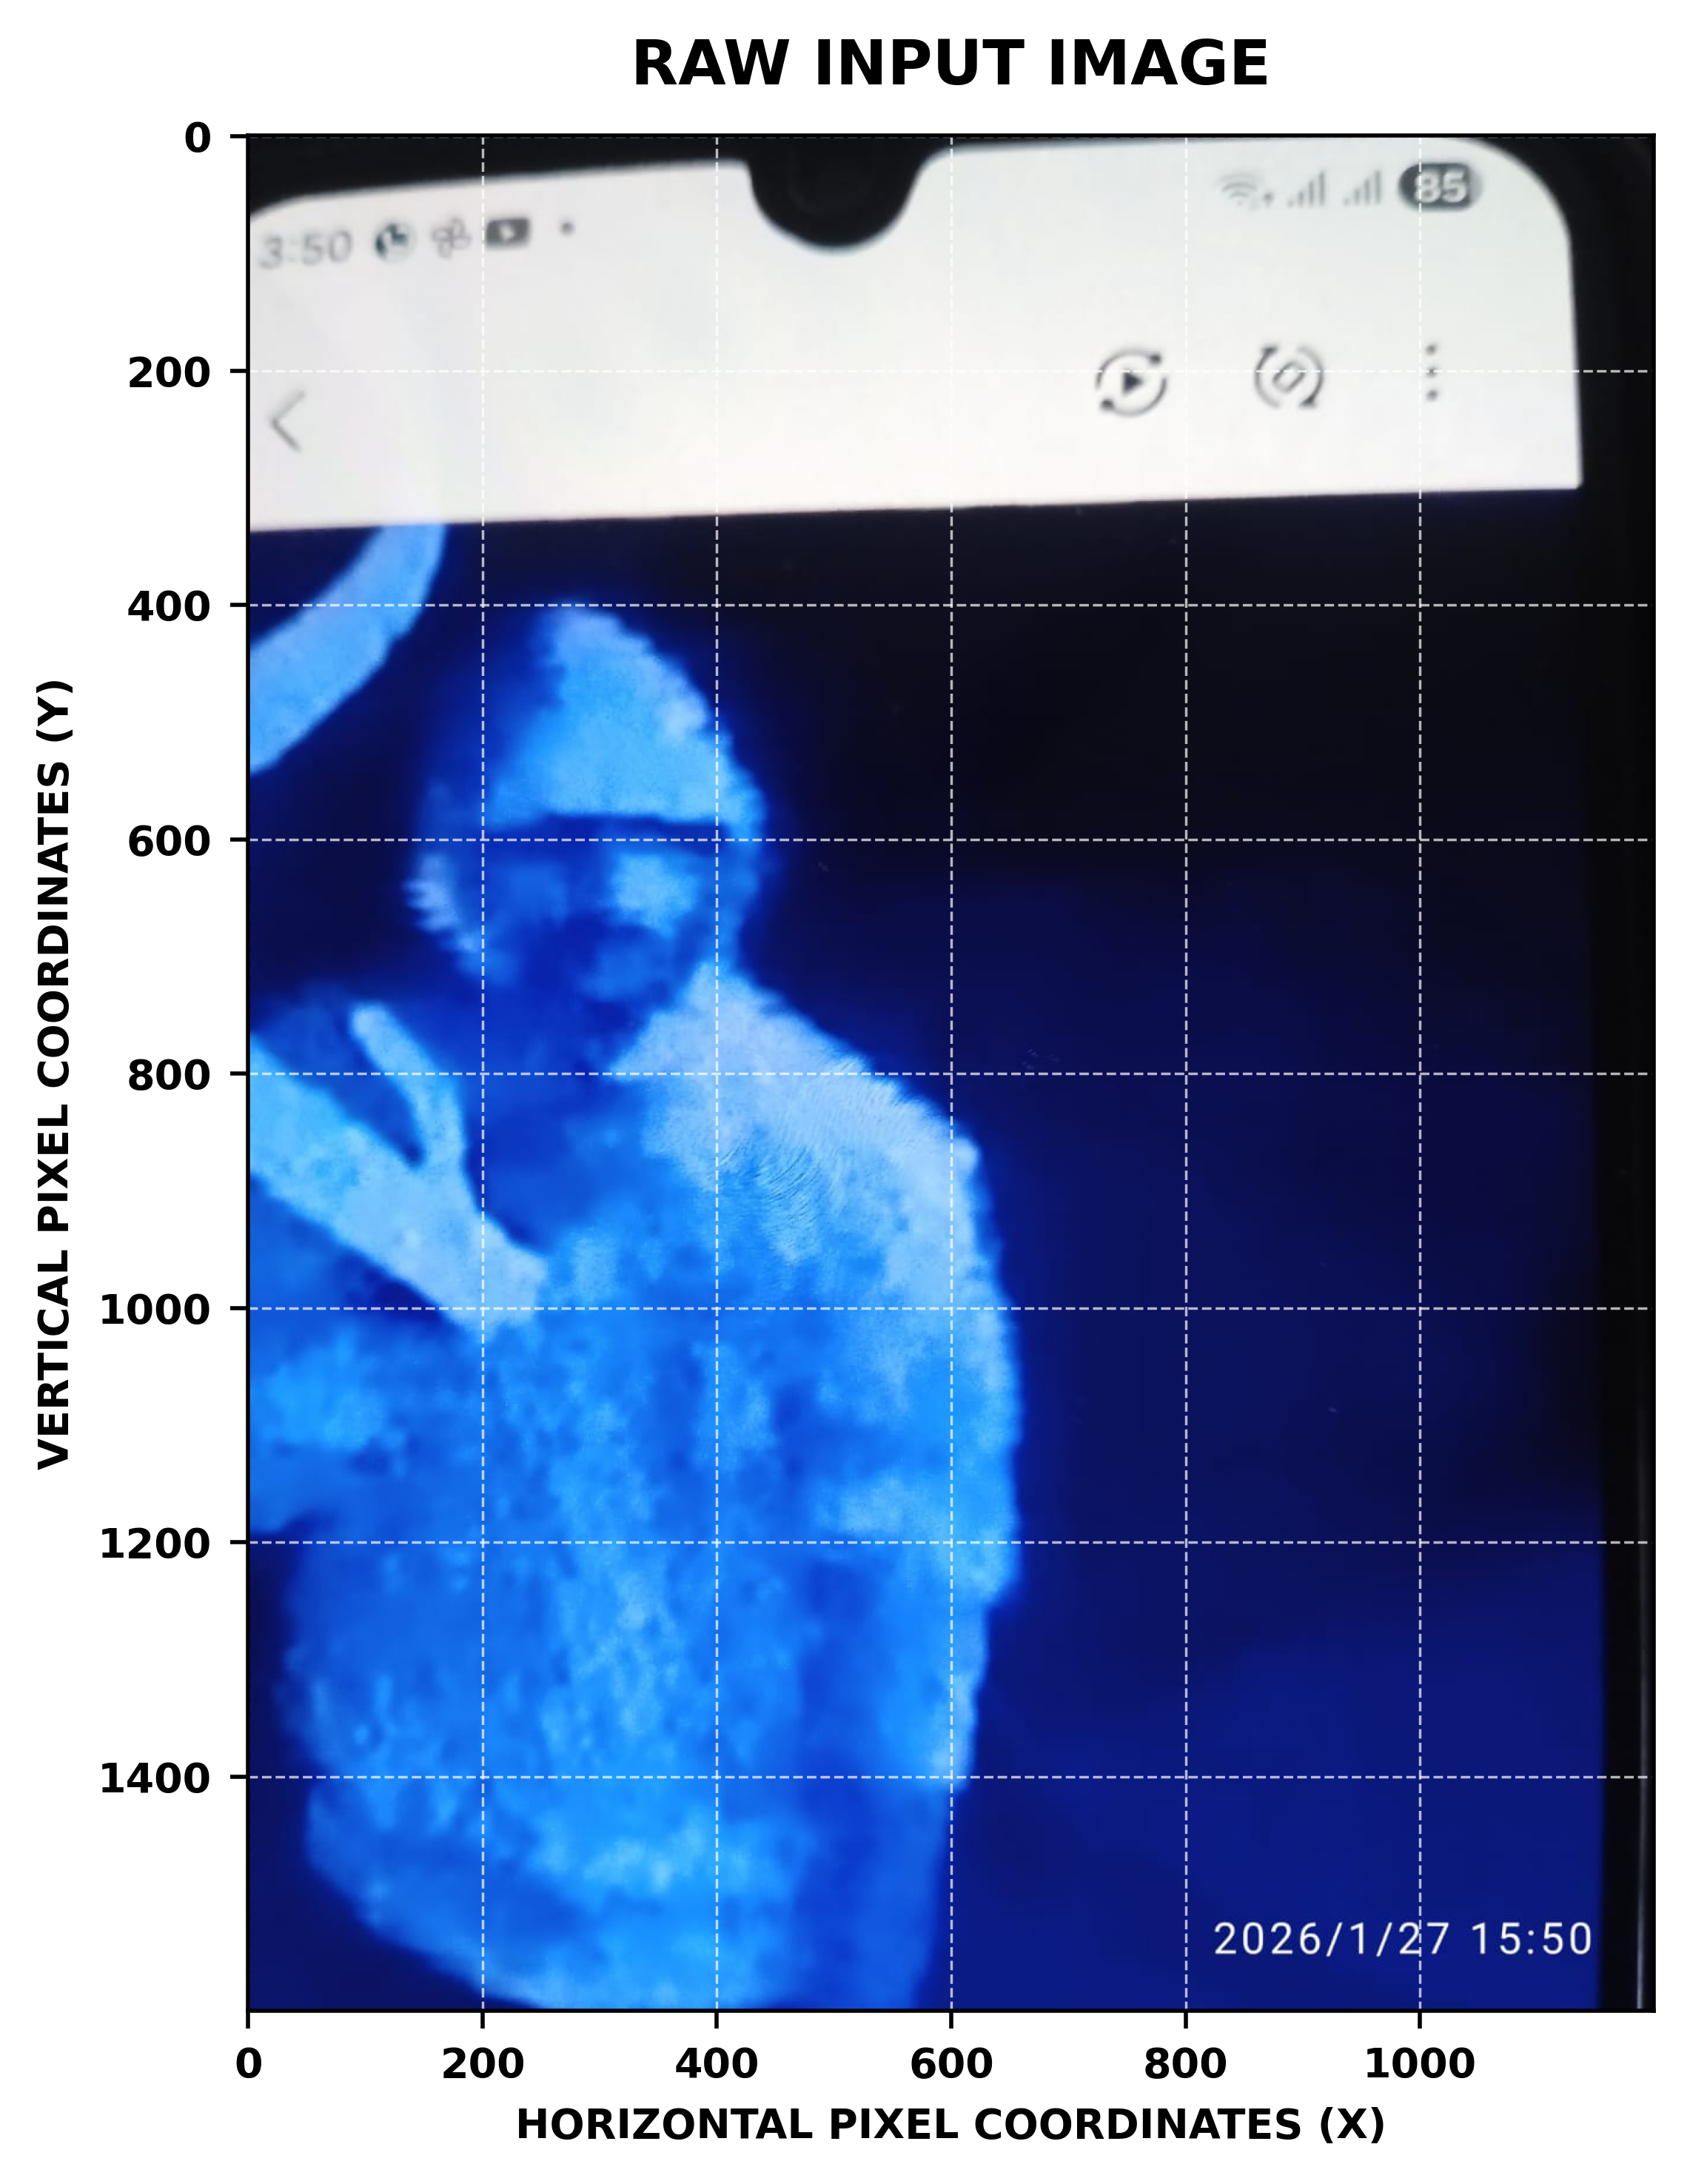

In [17]:
# -----------------------------------------------------------------------------
# DEFINE DATA PATHS
# -----------------------------------------------------------------------------
IMG_PATH = os.path.join('DATA', 'FACE IMG.jpeg')

# -----------------------------------------------------------------------------
# IMAGE LOADING UTILITY
# -----------------------------------------------------------------------------
def load_and_preprocess(path):
    """
    LOADS AN IMAGE FROM DISK AND CONVERTS IT TO RGB FORMAT.

    ARGS:
        PATH (STR): RELATIVE PATH TO THE IMAGE FILE.

    RETURNS:
        IMG_RGB (NUMPY.NDARRAY): THE LOADED IMAGE IN RGB FORMAT.
        IMG_BGR (NUMPY.NDARRAY): THE ORIGINAL BGR IMAGE (FOR OPENCV OPS).
    """
    if not os.path.exists(path):
        raise FileNotFoundError(f"CRITICAL ERROR: IMAGE NOT FOUND AT {path}")

    # READ IMAGE IN BGR FORMAT
    img_bgr = cv2.imread(path, cv2.IMREAD_COLOR)
    
    # CONVERT TO RGB FOR VISUALIZATION AND INFERENCE
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    return img_rgb, img_bgr

# -----------------------------------------------------------------------------
# EXECUTION
# -----------------------------------------------------------------------------
try:
    INPUT_IMG_RGB, INPUT_IMG_BGR = load_and_preprocess(IMG_PATH)
    
    # PRINT IMAGE STATISTICS FOR DEBUGGING
    print("IMAGE LOADED SUCCESSFULLY.")
    print(f"DIMENSIONS: {INPUT_IMG_RGB.shape}")
    print(f"DATA TYPE: {INPUT_IMG_RGB.dtype}")

    # VISUALIZE THE RAW INPUT
    display_image(INPUT_IMG_RGB, "RAW INPUT IMAGE")

except Exception as e:
    print(f"ERROR: {str(e).upper()}")